
Created on Tue Sep 15 07:42:56 2020
# Bezier curve points evenly distributed along the y or x direction

The Bezier curve is controlled with four points: 

    P0 (x0, y0)
    P1 (x1, y1)
    P2 (x2, y2)
    P3 (x3, y3)

For our purpose, the Bezier curve is symmetric to the x axis, and the lines P0P1 and P3P2 are parallel to the axi axis. Therefore,

    x0=x3=0;
    x1=x2;
    y0=y1;
    y2=y3=-y0;

In total there are three independent variables, x0, y0, and x1, with coordinates of points as below,
    P0 (x0, y0)
    P1 (x1, y0)
    P2 (x1, -y0)
    P3 (x0, -y0)
    
This code plot the curve and then determine coordinates of points uniformly distributed along the y axis 

@author: juliantao

The coordinates of points that evenly distributed along the y or x direction: 
 [[-2.39976000e-01  7.49999955e+01]
 [-2.80960416e+02  6.74947710e+01]
 [-3.78055656e+02  5.99858406e+01]
 [-4.43327400e+02  5.24837688e+01]
 [-4.91318784e+02  4.49890797e+01]
 [-5.27671296e+02  3.74904671e+01]
 [-5.55151464e+02  2.99911506e+01]
 [-5.75371944e+02  2.24806472e+01]
 [-5.89226400e+02  1.49847711e+01]
 [-5.97338664e+02  7.48142219e+00]
 [-5.99999976e+02 -2.24999997e-02]
 [-5.97322656e+02 -7.50382209e+00]
 [-5.89194216e+02 -1.50068665e+01]
 [-5.75323296e+02 -2.25022228e+01]
 [-5.55085824e+02 -3.00119676e+01]
 [-5.27587944e+02 -3.75102532e+01]
 [-4.91216616e+02 -4.50075022e+01]
 [-4.43204736e+02 -5.25003913e+01]
 [-3.77909664e+02 -6.00000150e+01]
 [-2.80785384e+02 -6.75053037e+01]
 [ 0.00000000e+00 -7.50000000e+01]]


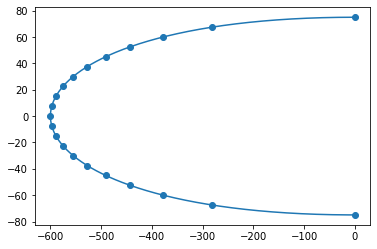

In [ ]:

import numpy as np
import matplotlib.pyplot as plt


######### INPUT  ##########################################   
W=150       #Width of the layout
L=600       #Length of the layout
N=21        #Number of minipiles 
x1=-L*4/3    #x coordinate of the control points P1 and P2
y0=W/2      #y coordinate of the control point P0
x0=0        #x coordinate of the control point P0
direction=1 # use 1 to get distribution along y axis, use 2 to get distrubution along the x axis
###########################################################   

points = [[x0, y0], [x1,y0], [x1, -y0], [x0,-y0]]

# number of sampling points, the greater the better
t=np.linspace(0, 1, num=10001)

X=(1-t)**3*points[0][0]+3*(1-t)**2*t*points[1][0]+3*(1-t)*t**2*points[2][0]+t**3*points[3][0]
Y=(1-t)**3*points[0][1]+3*(1-t)**2*t*points[1][1]+3*(1-t)*t**2*points[2][1]+t**3*points[3][1]


# determine the positions of the mini piles
index=[]
if direction==1:
  for i2 in range(N-1):
      idx=next(x for x, val in enumerate(Y) 
                                    if val < W/2-W*i2/(N-1))
      index.append(idx)
  index.append(len(t)-1)
elif direction==2:
  for i2 in range(N-1):
      idx=next(x for x, val in enumerate(X) 
                                    if val > L*i2/(N-1) or val < -L*i2/(N-1) )
      index.append(idx)
  index.append(len(t)-1)

XX=[X[i3] for i3 in index]
YY=[Y[i4] for i4 in index]
coord=np.empty((N,2))
coord[:,0]=XX
coord[:,1]=YY
plt.plot(X,Y)
plt.scatter(XX, YY)

print("The coordinates of points that evenly distributed along the y or x direction: \n", coord)